In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [194]:
# Challenge 1
# This is a dataset about people who are in the criminal justice system of Broward County, FL.
df = pd.read_csv("compas.csv")

In [195]:
# Challenge 2
# The important column to notice is `decile_score`.
# This is the COMPAS score assigned to a defendant.
# It ranges from 1 - 10, where 10 is considered "extremely likely to commit another crime".
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

<AxesSubplot:xlabel='age', ylabel='count'>

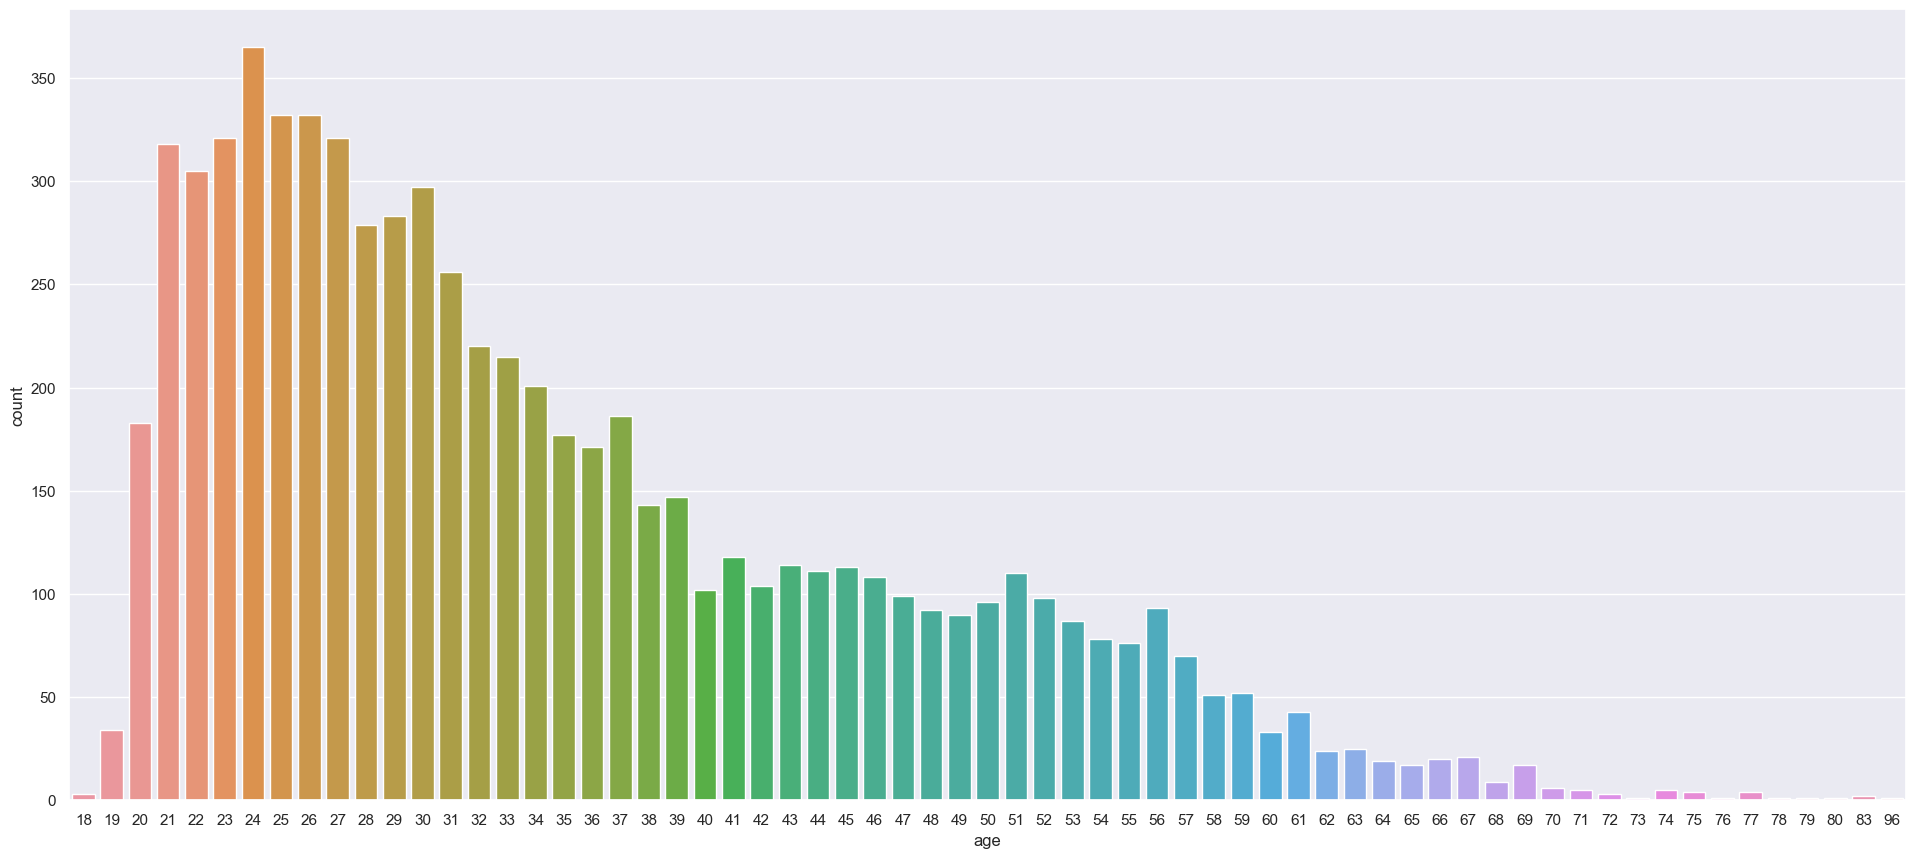

In [196]:
sns.set(rc={'figure.figsize':(23.7,10.27)})
sns.countplot(x=df["age"])

There are 1576 people older than 45
There are 4109 people older than 25, younger than 45
There are 1529 people younger than 25


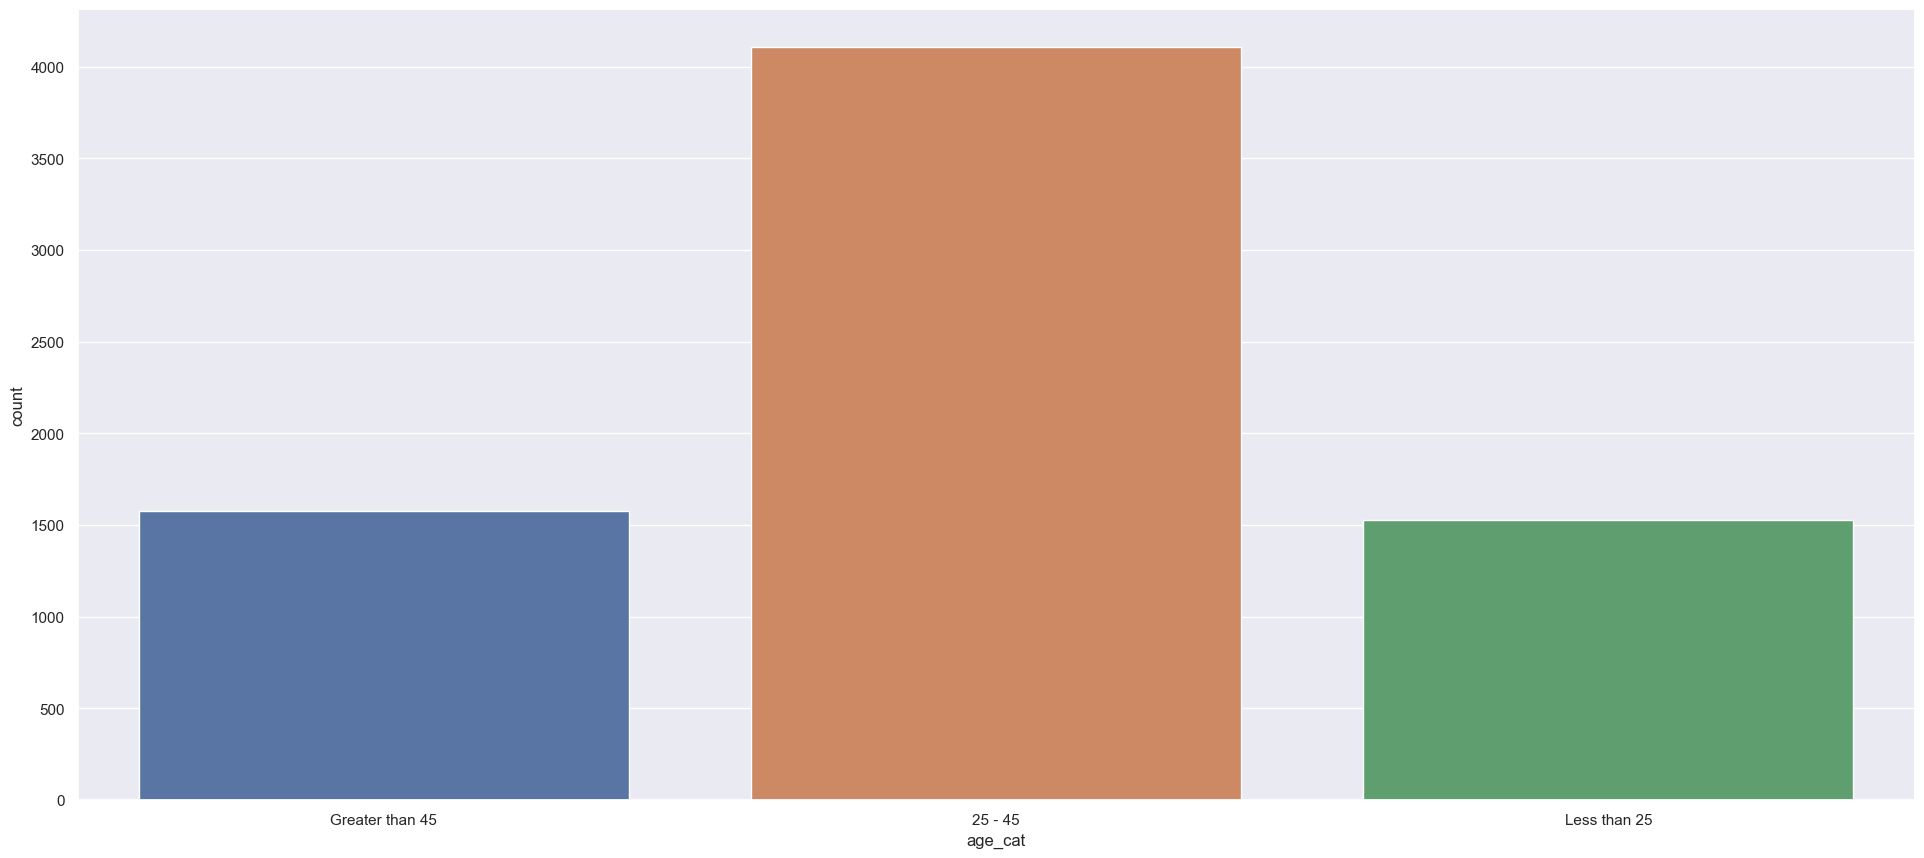

In [197]:
sns.countplot(x=df["age_cat"])
print(f'There are {df["age_cat"].tolist().count("Greater than 45")} people older than 45')
print(f'There are {df["age_cat"].tolist().count("25 - 45")} people older than 25, younger than 45')
print(f'There are {df["age_cat"].tolist().count("Less than 25")} people younger than 25')

<AxesSubplot:xlabel='age', ylabel='Count'>

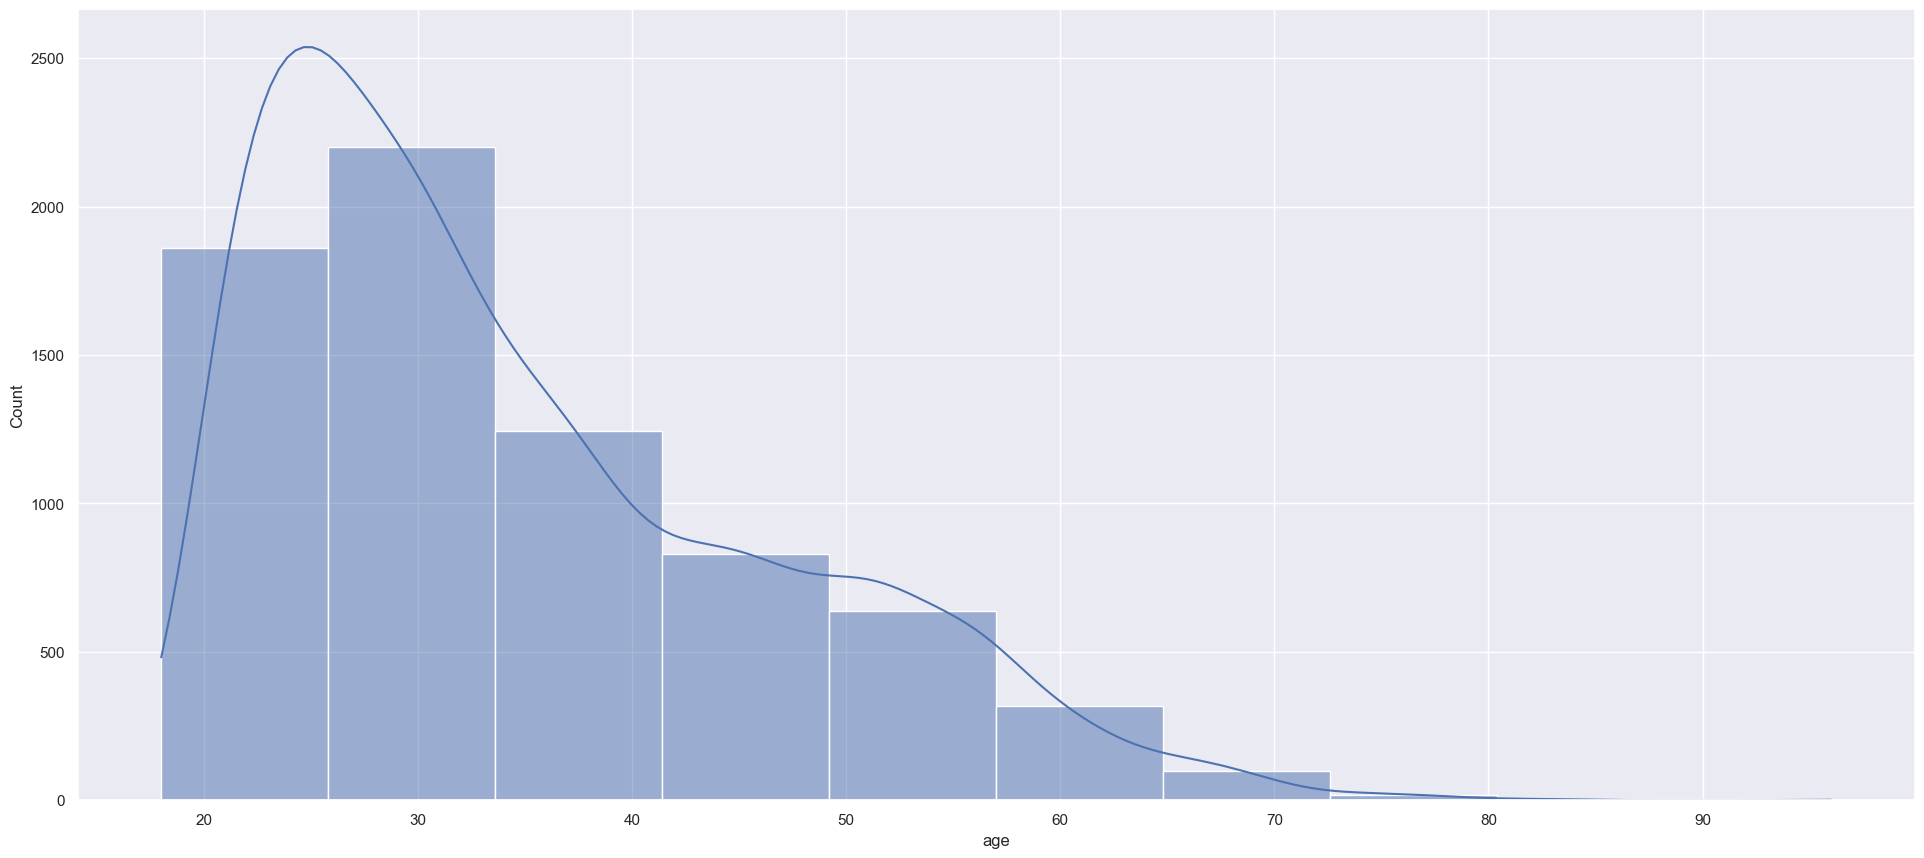

In [198]:
sns.histplot(x=df["age"], kde=True, bins=10)

<AxesSubplot:title={'center':'Jail Time after First Charge'}, xlabel='Days In Jail', ylabel='Age'>

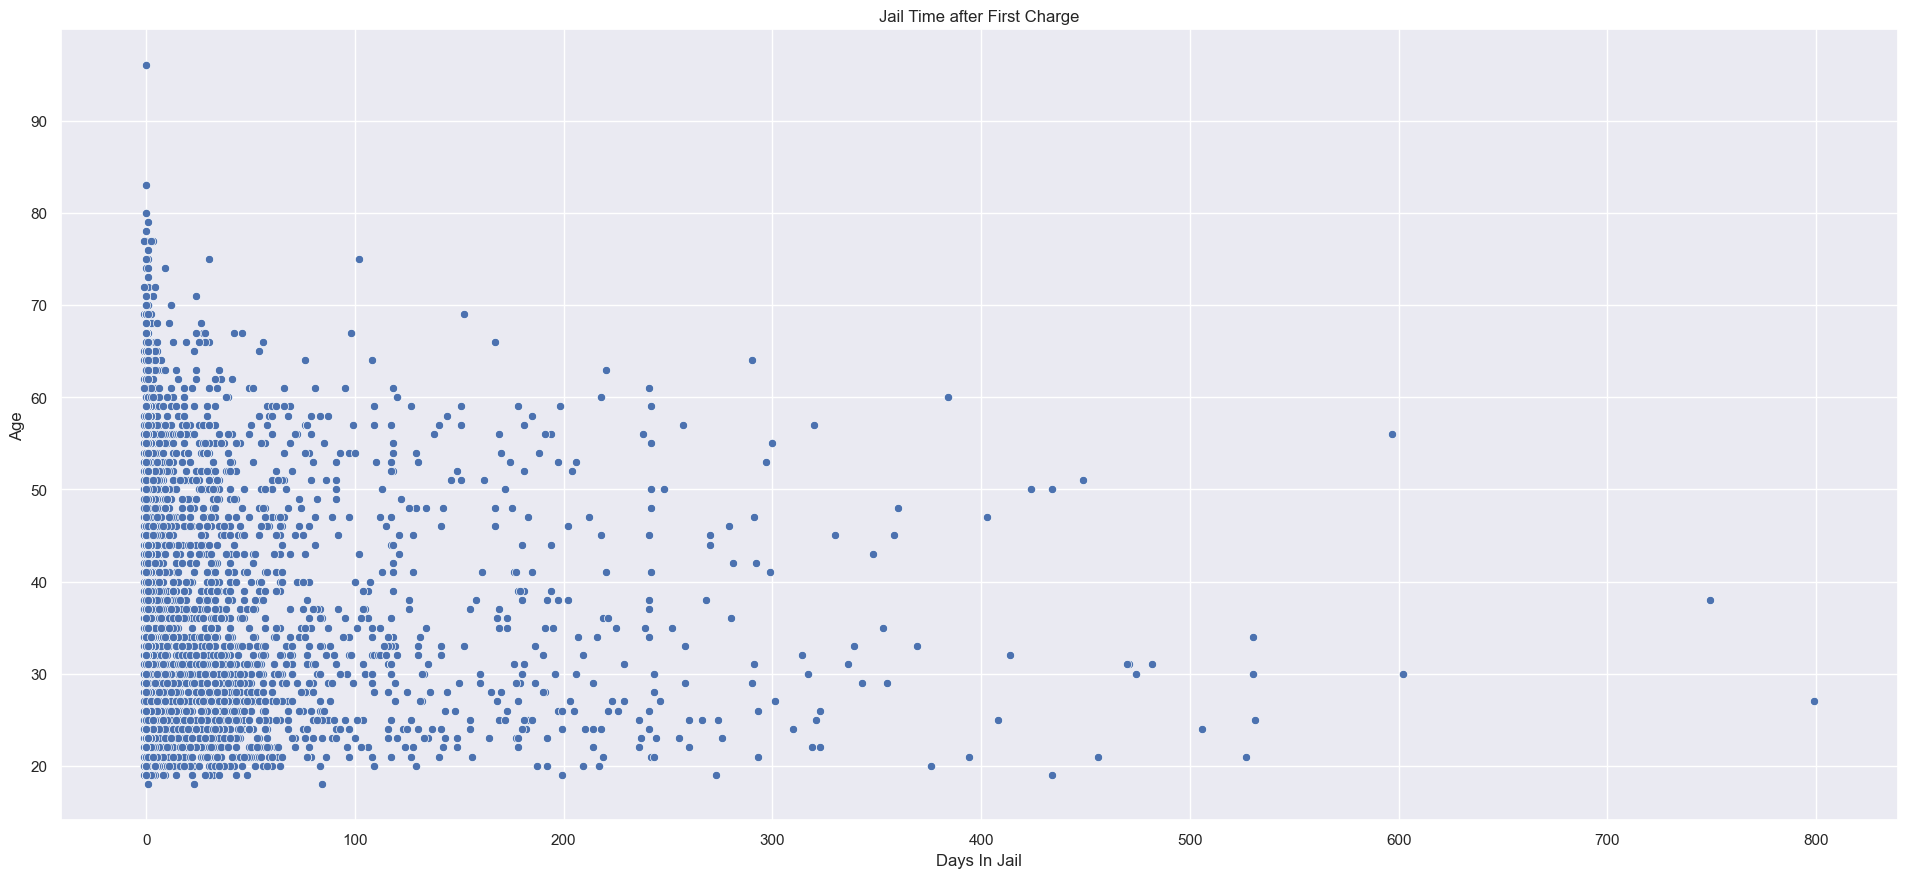

In [199]:
#ChatGPTSolution
df['start_date'] = pd.to_datetime(df.iloc[:, 16], errors='coerce')
df['end_date'] = pd.to_datetime(df.iloc[:, 17], errors='coerce')
df['days_in_jail'] = (df['end_date'] - df['start_date']).dt.days.fillna(0).astype(int)
df.drop(['start_date', 'end_date'], axis=1, inplace=True)
SP = sns.scatterplot(data=df, x="days_in_jail", y="age")
SP.set(xlabel="Days In Jail", ylabel="Age", title="Jail Time after First Charge")
SP

<AxesSubplot:title={'center':'Jail Time after First Charge'}, xlabel='Days In Jail', ylabel='Age'>

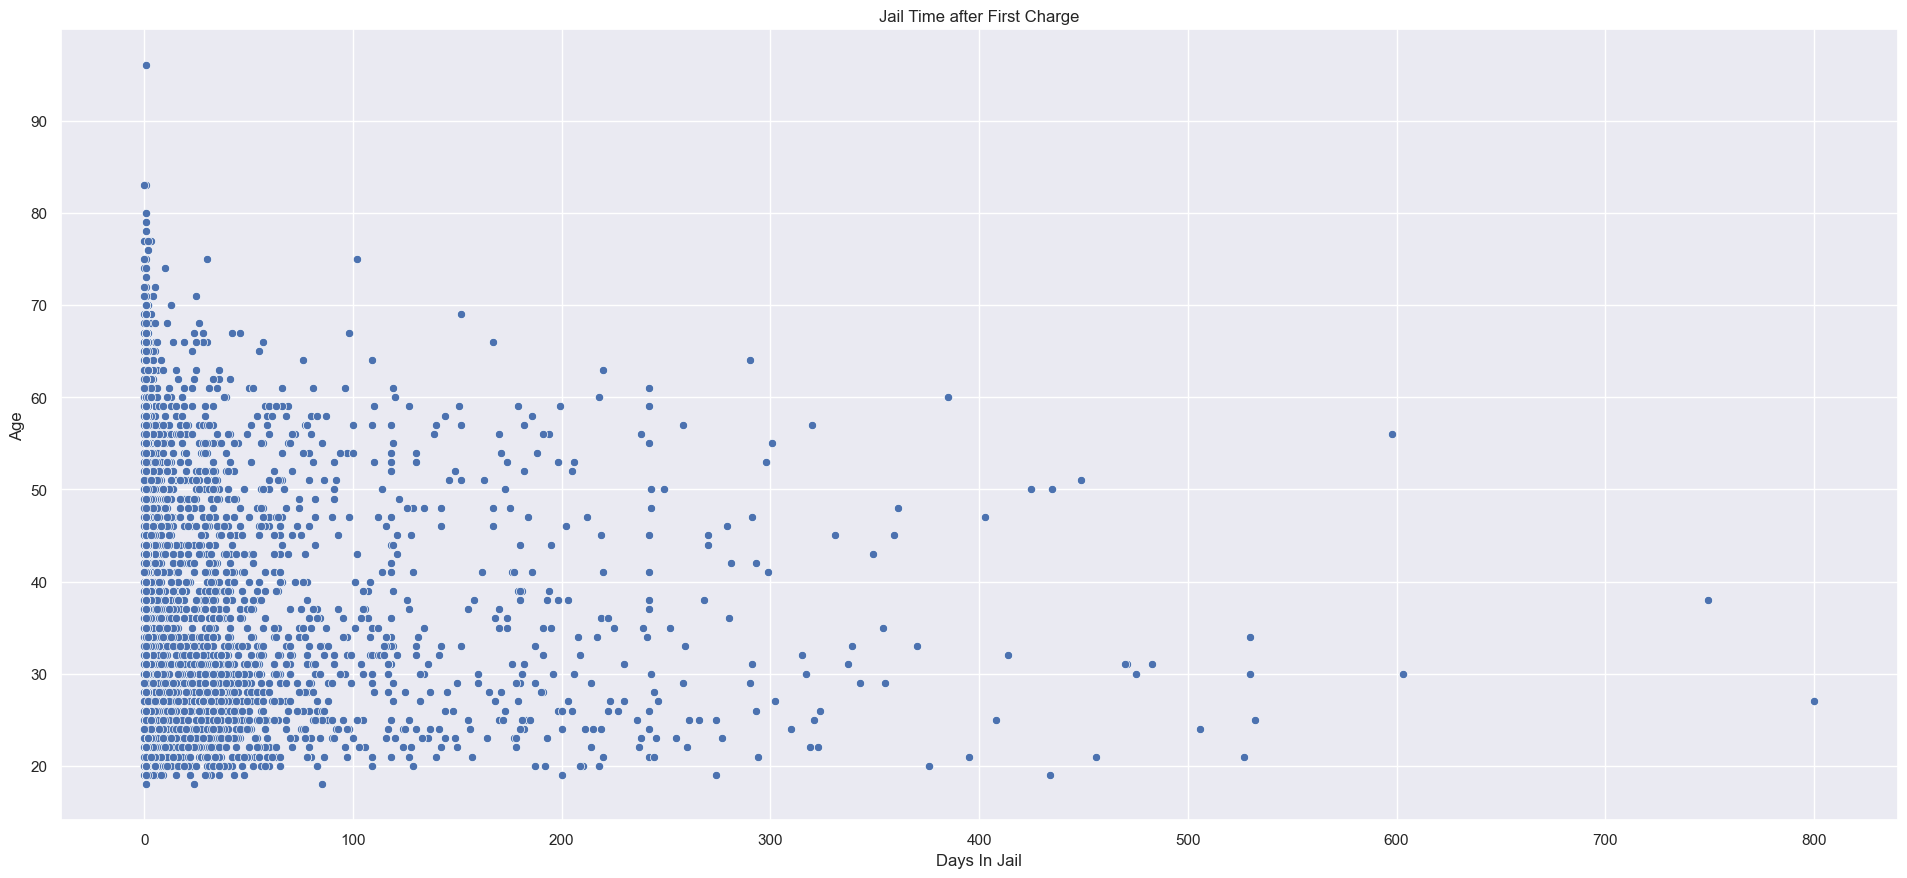

In [200]:
#My Solution
days_in_jail = []
for i in range(len(df)):
    if(type(df.iloc[i][16]) == float):
        days_in_jail.append(0)
    elif(type(df.iloc[i][16]) != float):
        x = int(df.iloc[i][16][:4])
        y = int(df.iloc[i][16][5:7])
        z = int(df.iloc[i][16][8:10])
        xx = int(df.iloc[i][17][:4])
        yy = int(df.iloc[i][17][5:7])
        zz = int(df.iloc[i][17][8:10])
        f_date = dt.date(x, y, z)
        l_date = dt.date(xx, yy, zz)
        DaysInJail = l_date - f_date
        days_in_jail.append(DaysInJail.days)
df['days_in_jail'] = days_in_jail
SP2 = sns.scatterplot(data=df, x="days_in_jail", y="age")
SP2.set(xlabel="Days In Jail", ylabel="Age", title="Jail Time after First Charge")
SP2

Other: 377
African-American: 3696
Caucasian: 2454
Hispanic: 637
Native American: 18
Asian: 32


<AxesSubplot:xlabel='race', ylabel='count'>

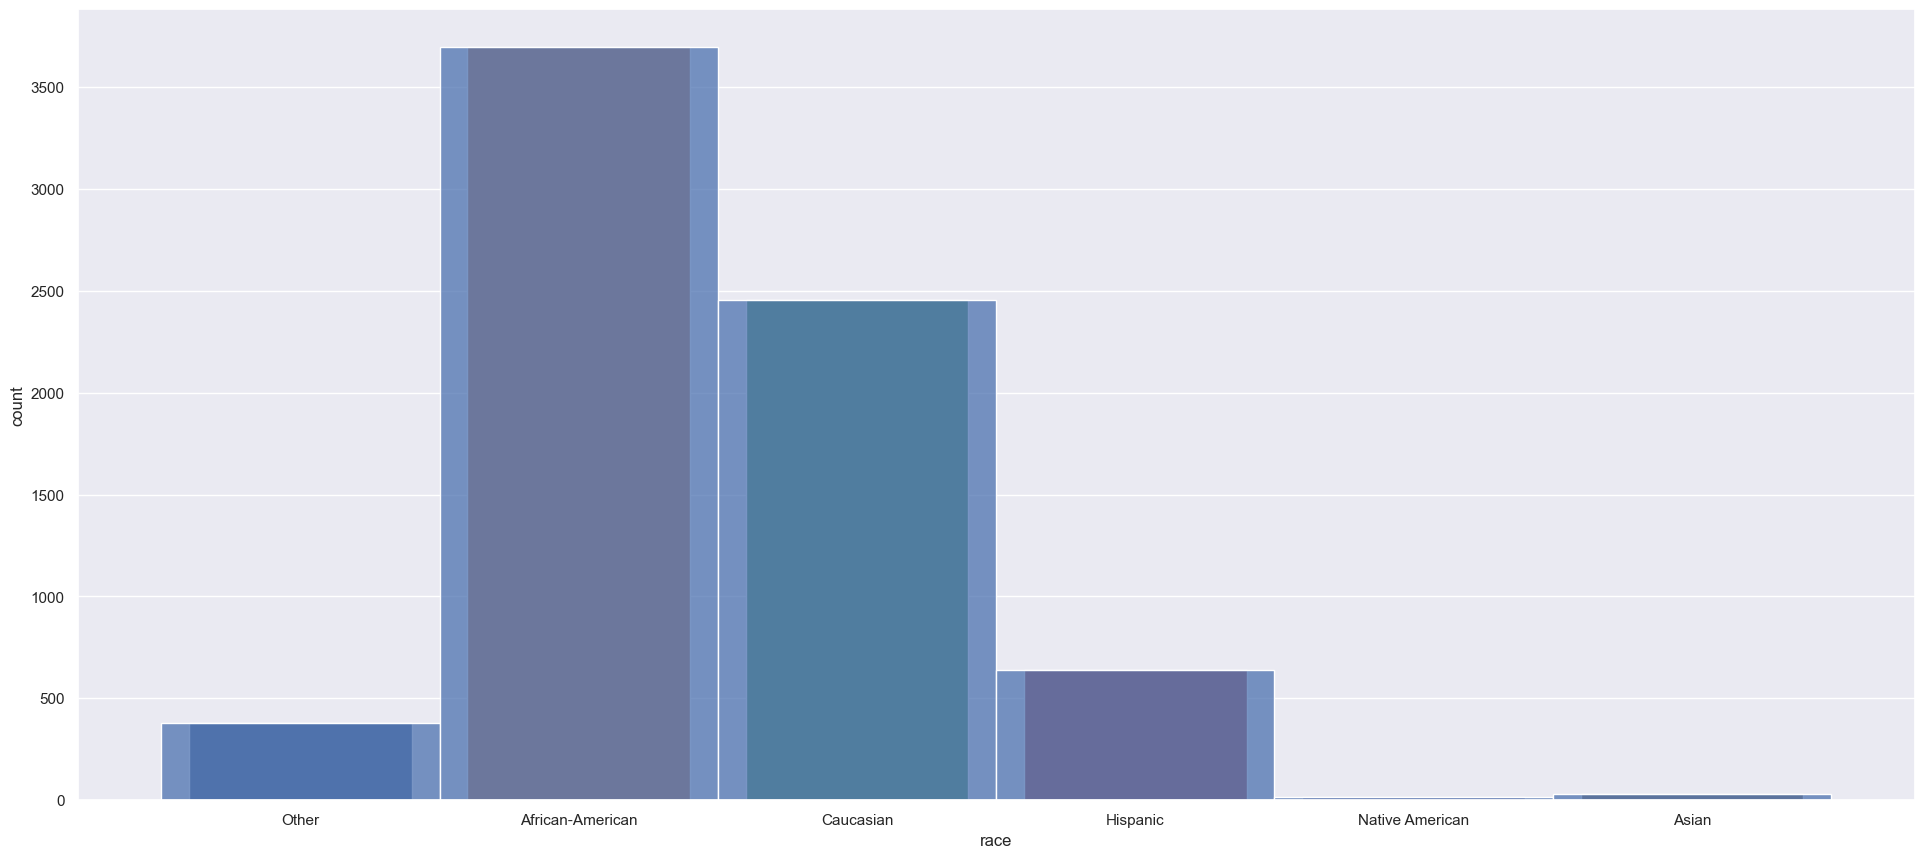

In [203]:
race = []
for i in df["race"]:
    if i not in race:
        race.append(i)
for i in race:
    count = df['race'].value_counts()[i]
    print(f'{i}: {count}')
sns.countplot(x=df["race"])